In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
board = pd.read_csv("data/leaderboard_20210403.csv")
board

,TeamId,TeamName,SubmissionDate,Score
0,4117209,KDJ2020,2021-03-06 09:03:47,7.536800e-01
1,3580817,Shorokhov Sergey,2019-12-25 14:44:28,7.695500e-01
2,5391768,VNPT@DS,2020-11-04 02:19:27,7.839900e-01
3,2300090,Konstantin Yakovlev,2018-12-19 12:00:55,7.921500e-01
4,1527922,b_b,2019-03-16 08:38:59,7.935800e-01
...,...,...,...,...
10819,5491601,Kumari Ruchi,2020-09-08 17:21:57,1.387682e+07
10820,2731682,Sujith Achuthan,2019-02-12 16:15:52,3.708267e+11
10821,4943208,Devansh Mishra,2020-05-19 17:30:13,4.480669e+11
10822,2023154,Jacky Nguyen,2018-08-31 09:44:36,1.675717e+16


1.0291800000000002


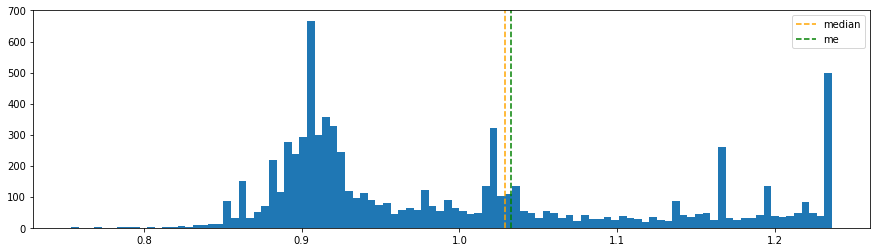

In [30]:
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.hist(board["Score"][:8000], bins=100)
m = np.median(board["Score"])
print(m)
ax.axvline(m, color="orange", linestyle="--", label="median")
ax.axvline(1.03278, color="green", linestyle="--", label="me")
#ax.set_yscale("log")
ax.legend()
plt.show()

In [37]:
score_count = board.groupby("Score").agg({"TeamName": "count"}).sort_values(by="Score").reset_index()

score_count

,Score,TeamName
0,7.536800e-01,1
1,7.695500e-01,1
2,7.839900e-01,1
3,7.921500e-01,1
4,7.935800e-01,1
...,...,...
6624,1.387682e+07,2
6625,3.708267e+11,1
6626,4.480669e+11,1
6627,1.675717e+16,1


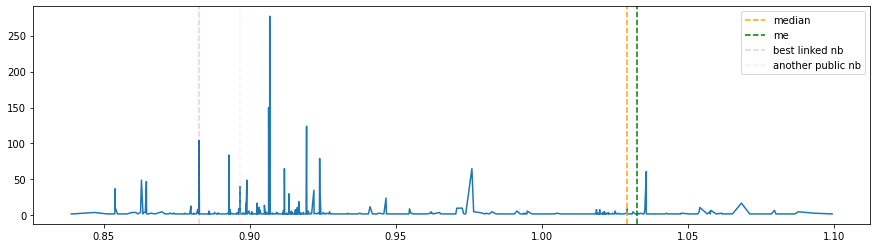

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))

score_count_filtered = score_count.query("Score <= 1.1 and TeamName > 1")
ax.plot(
    score_count_filtered["Score"],
    score_count_filtered["TeamName"],
)
ax.axvline(m, color="orange", linestyle="--", label="median")
ax.axvline(1.03278, color="green", linestyle="--", label="me")
ax.axvline(0.88263, color="purple", alpha=0.2, linestyle="--", label="best linked nb") # https://www.kaggle.com/ahmedmurad1990/predict-future-sales
ax.axvline(0.89668, color="pink", alpha=0.3, linestyle="--", label="another public nb") # https://www.kaggle.com/wangqiyuan/xgb-baseline-advanced-feature-engineering

ax.legend()

plt.show()